# Tuning parameters

In [27]:
from importlib import reload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ddn3 import tools, ddn
import parameter_tuning_parallel as parameter_tuning
reload(parameter_tuning)

<module 'parameter_tuning_parallel' from 'E:\\OneDrive - Virginia Tech\\x_code\\ddn\\try_exp\\data_qiuman\\parameter_tuning_parallel.py'>

In [12]:
# Put the three data in the same folder of this notebooks
dat_rna = pd.read_csv("sub.expr.rna.transport", sep='\s+', header=None).to_numpy()
dat_ribo = pd.read_csv("sub.expr.ribo.transport", sep='\s+', header=None).to_numpy()
dat_protein = pd.read_csv("sub.expr.protein.transport", sep='\s+', header=None).to_numpy()

# The number of cores in the computer
cores = 16

Three data pairs

In [ ]:
dat1 = dat_rna
dat2 = dat_ribo

# dat1 = dat_rna
# dat2 = dat_protein

# dat1 = dat_ribo
# dat2 = dat_protein

## Try DDN first
Limit the number of edges used in CV for each node.  
Too dense graph lead to very slow regression calculation for large networks.

In [ ]:
g_beta_est = ddn.ddn_parallel(
    dat1,
    dat2,
    lambda1=0.25,
    lambda2=0.075,
    n_process=16,
)
g1_net_est = tools.get_net_topo_from_mat(g_beta_est[0])
g2_net_est = tools.get_net_topo_from_mat(g_beta_est[1])

Degree distribution

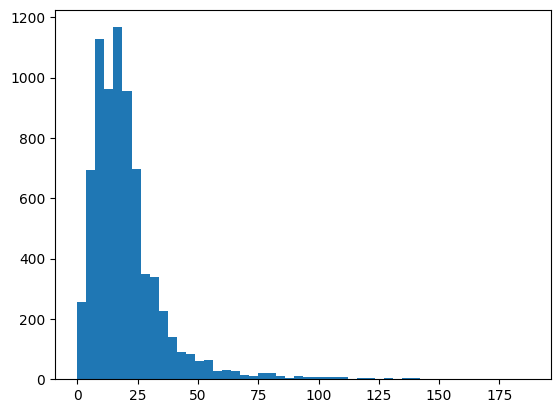

In [11]:
deg1 = np.sum(g1_net_est, axis=1)
_ = plt.hist(deg1, bins=50)

For node with low degrees, set to allow 25 edges.

In [17]:
cv_max_deg = np.copy(deg1)
cv_max_deg[cv_max_deg<25] = 25

## First round of search

In [28]:
reload(parameter_tuning)
dp = parameter_tuning.DDNParameterSearch(
    dat1, dat2, 
    n_cv=5,
    ratio_validation=0.5, 
    lambda1_list=np.arange(0.1, 0.805, 0.1),
    lambda2_list=np.arange(0.0, 0.205, 0.05),
    cores=cores,
    cv_max_edge=cv_max_deg,
)

In [29]:
val_err_0, _, _ = dp.fit("cv_joint")

0 0 0 s0
0 0 0 s1
0 0 1 s0
0 0 1 s1
0 0 2 s0
0 0 2 s1
0 0 3 s0
0 0 3 s1
0 0 4 s0
0 0 4 s1
0 1 0 s0
0 1 0 s1
0 1 1 s0
0 1 1 s1
0 1 2 s0
0 1 2 s1
0 1 3 s0
0 1 3 s1
0 1 4 s0
0 1 4 s1
0 2 0 s0
0 2 0 s1
0 2 1 s0
0 2 1 s1
0 2 2 s0
0 2 2 s1
0 2 3 s0
0 2 3 s1
0 2 4 s0
0 2 4 s1
0 3 0 s0
0 3 0 s1
0 3 1 s0
0 3 1 s1
0 3 2 s0
0 3 2 s1
0 3 3 s0
0 3 3 s1
0 3 4 s0
0 3 4 s1
0 4 0 s0
0 4 0 s1
0 4 1 s0
0 4 1 s1
0 4 2 s0
0 4 2 s1
0 4 3 s0
0 4 3 s1
0 4 4 s0
0 4 4 s1
0 5 0 s0
0 5 0 s1
0 5 1 s0
0 5 1 s1
0 5 2 s0
0 5 2 s1
0 5 3 s0
0 5 3 s1
0 5 4 s0
0 5 4 s1
0 6 0 s0
0 6 0 s1
0 6 1 s0
0 6 1 s1
0 6 2 s0
0 6 2 s1
0 6 3 s0
0 6 3 s1
0 6 4 s0
0 6 4 s1
0 7 0 s0
0 7 0 s1
0 7 1 s0
0 7 1 s1
0 7 2 s0
0 7 2 s1
0 7 3 s0
0 7 3 s1
0 7 4 s0
0 7 4 s1
1 0 0 s0
1 0 0 s1
1 0 1 s0
1 0 1 s1
1 0 2 s0
1 0 2 s1
1 0 3 s0
1 0 3 s1
1 0 4 s0
1 0 4 s1
1 1 0 s0
1 1 0 s1
1 1 1 s0
1 1 1 s1
1 1 2 s0
1 1 2 s1
1 1 3 s0
1 1 3 s1
1 1 4 s0
1 1 4 s1
1 2 0 s0
1 2 0 s1
1 2 1 s0
1 2 1 s1
1 2 2 s0
1 2 2 s1
1 2 3 s0
1 2 3 s1
1 2 4 s0
1 2 4 s1
1 3 0 s0
1

The output (val_err_0) is of shape (number of CV, number of lambda1, number of lambda2)

In [35]:
val_err_0[0]

array([[0.87083615, 0.8457203 , 1.10956998, 0.88257747, 3.2925744 ],
       [0.82161246, 0.81495639, 0.81769174, 0.82250501, 0.82432748],
       [0.81442281, 0.81105592, 0.80949111, 0.81241205, 0.81586015],
       [0.82401549, 0.82855312, 0.83228226, 0.83872212, 0.84359031],
       [0.85150205, 0.86701744, 0.88077834, 0.89210462, 0.9003436 ],
       [0.89816222, 0.91998174, 0.93700189, 0.94936364, 0.95480318],
       [0.94835204, 0.96710596, 0.97826116, 0.98360676, 0.98689006],
       [0.98196361, 0.98891389, 0.99351913, 0.99775915, 0.99876107]])

In [37]:
# np.arange(0.1, 0.805, 0.1)

In [ ]:
parameter_tuning.plot_error_2d(val_err_0, cmin=0.0, cmax=1.0)

In [ ]:
np.mean(val_err_0, axis=0)

In [ ]:
np.std(val_err_0, axis=0)

## Second round of search

In [ ]:
dp1 = parameter_tuning.DDNParameterSearch(
    dat1, dat2,
    n_cv=5,
    ratio_validation=0.5, 
    lambda1_list=np.arange(0.1, 0.401, 0.05),
    lambda2_list=np.arange(0.05, 0.151, 0.025),
    cores=cores,
    cv_max_edge=cv_max_deg,
)

In [ ]:
val_err_1, _, _ = dp1.fit("cv_joint")

In [ ]:
parameter_tuning.plot_error_2d(val_err_1)

In [ ]:
np.mean(val_err_1, axis=0)

In [ ]:
np.std(val_err_1, axis=0)

## Save results

In [ ]:
if 0:
    np.savez("joint_search_rna_protein_n_20.npz", 
             err_0=val_err_0, 
             err_1=val_err_1, 
             l1_0=np.arange(0.1, 0.805, 0.1),
             l2_0=np.arange(0.0, 0.205, 0.05),
             l1_1=np.arange(0.1, 0.401, 0.05),
             l2_1=np.arange(0.05, 0.151, 0.025),         
    )
